# K Means clustering (Min Han Soe)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1(a)Loading the dataset

In [3]:
#loading the dataset
df = pd.read_csv('Customers_practice.csv')

# 1(b)Printing the first 10 rows of the dataset

In [6]:
df.head(10)

,Annual_Income_(k$),Spending_Score
0,103,85
1,60,52
2,59,55
3,62,55
4,48,47
5,44,50
6,73,5
7,33,92
8,71,75
9,21,66


# 1(c)Display a scatter plot of the data

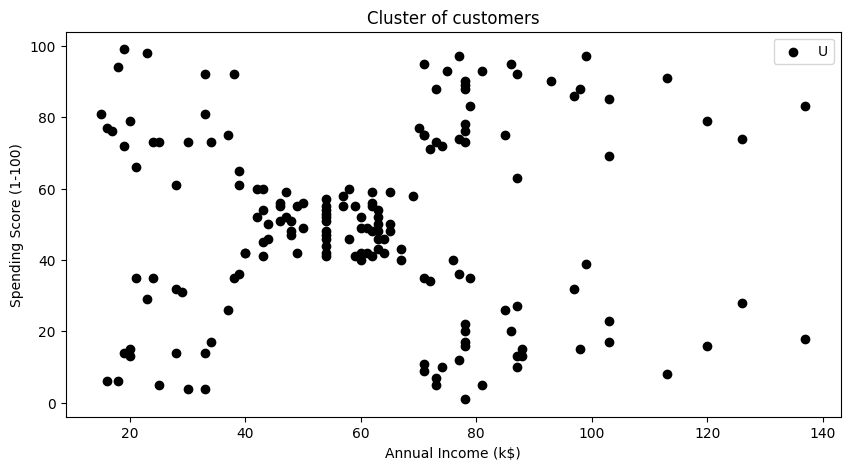

In [21]:
#plotting the dataset with a scatter plot
plt.figure(figsize=[10,5])
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], color='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend('Unknown class')
plt.title('Cluster of customers')
plt.show()

# 2(a) Testing kmean algo with k=3

In [22]:
#importing KMeans 
from sklearn.cluster import KMeans

In [24]:
#Creating a kmean object
kmean = KMeans(n_clusters=3, random_state=0)

In [29]:
#fitting the dataset into the kmean
kmean.fit(df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

# 2(b) Accessing labels 

In [34]:
#Accessing labels of the model 
np.unique(kmean.labels_)

array([0, 1, 2], dtype=int32)

# 2(c) Printing the centroid of the clusters

In [31]:
#Accessing centroids of the clusters
kmean.cluster_centers_

array([[87.54545455, 19.24242424],
       [44.35576923, 49.63461538],
       [86.84848485, 82.63636364]])

# 2(d) Plotting according to the algorithmn

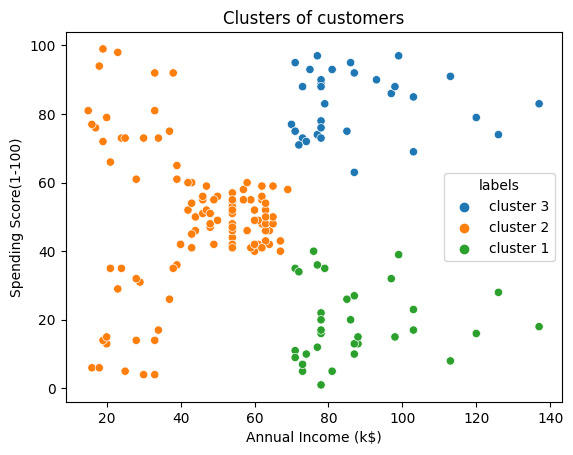

In [115]:
#Assigning labels names
X = df.copy()
X['labels'] = kmean.labels_
X.loc[X['labels'] == 0, 'labels'] = 'cluster 1'
X.loc[X['labels'] == 1, 'labels'] = 'cluster 2'
X.loc[X['labels'] == 2, 'labels'] = 'cluster 3'
#plotting the clusters according to color
ax = sns.scatterplot(data=X, x='Annual_Income_(k$)', y='Spending_Score', hue='labels')
ax.set(xlabel='Annual Income (k$)', ylabel='Spending Score(1-100)', title='Clusters of customers')
plt.show()

# 2(e) Why k=3 seems not appropriate

k = 3 seems not appropriate for this dataset because as we can see in the scatter plot there seems to be 5 clusters visually and by assigning the number of clusters to 3 make the algorithmn to force classifying the 3 clusters into one.

# 2(f) Plotting the centroids on the scatter plot

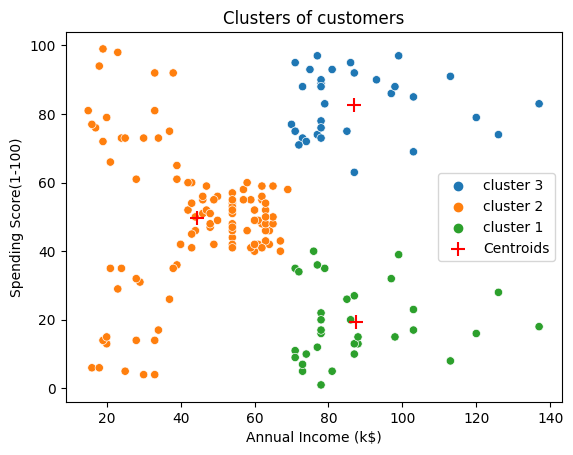

In [118]:
#Plotting the centroids 
ax = sns.scatterplot(data=X, x='Annual_Income_(k$)', y='Spending_Score', hue='labels')
ax.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='red', s=100, marker='+', label='Centroids')
ax.set(xlabel='Annual Income (k$)', ylabel='Spending Score(1-100)', title='Clusters of customers')
ax.legend()
plt.show()

# 3(a) Finding the optimal value of k

In [89]:
Sum_of_squared_distances = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=42, init='k-means++')
    km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

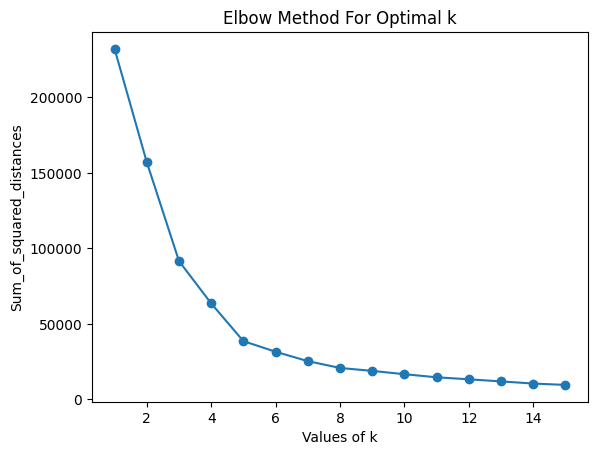

In [119]:
plt.plot(range(1,16), Sum_of_squared_distances, marker='o')
plt.xlabel('Values of k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# 3(b) Training with best k value

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


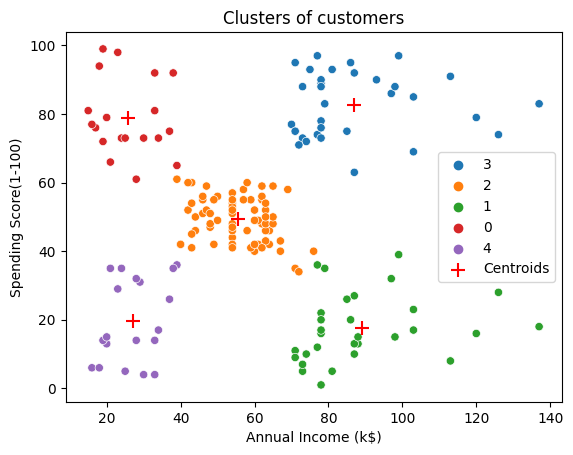

In [117]:
kmo = KMeans(n_clusters=5, random_state=42, init='k-means++')
kmo.fit(df)
ax = sns.scatterplot(data=df, x=df['Annual_Income_(k$)'], y=df['Spending_Score'], hue=kmo.labels_.astype(str))
ax.set(xlabel='Annual Income (k$)', ylabel='Spending Score(1-100)', title='Clusters of customers')
ax.scatter(kmo.cluster_centers_[:, 0], kmo.cluster_centers_[:, 1], c='red', s=100, marker='+', label='Centroids')
ax.legend()
plt.show()

Cluster 1 contains the customers with low annual income and higher spending
Cluster 2 contains the customers with high annual income and lower spending
Cluster 3 contains the customers with mid annual income and mid spending
Cluster 4 contains the customers with high annual income and high spending 
Cluster 5 contains the customers with low annual income and low spending 

# 5(a) Use your trained kmeans on optimal value of k (found in part 4) to predict the test samples just loaded.

In [107]:
df1 = pd.read_csv('Customers_practice_test.csv')
kmo.predict(df1)

array([2, 4, 2, 3, 3, 2, 0, 0, 3, 3, 2, 2, 0, 2, 2, 3, 1, 4, 2, 1, 4, 2,
       3, 1, 1, 2, 2, 4, 1, 2], dtype=int32)

# 5(b) Print the predictions

In [105]:
print(kmo.predict(df1))

[2 4 2 3 3 2 0 0 3 3 2 2 0 2 2 3 1 4 2 1 4 2 3 1 1 2 2 4 1 2]


# 5(c) Plot the decision boundaries (here is an example with k=3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


('#FFFB00', '#C7C7C7', '#00AEFF', '#2EFF00', '#FF0000', '#E000FF', '#FFA600')
['#FFFB00', '#C7C7C7', '#00AEFF', '#2EFF00', '#E000FF']


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

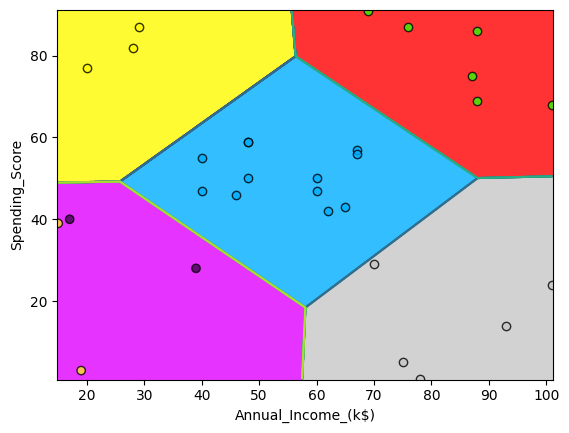

In [106]:
plot_decision_boundaries(kmo, df1)